In [1]:
import pandas as pd
import os
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
dm_file_list = ['veh_onehone_plotcdfv2.csv',
 'glass_onehone_plotcdfv2.csv',
 'ecoli_onehone_plotcdfv2.csv',
 'yeast_onehone_plotcdfv2.csv',
 'opt_onehone_plotcdfv2.csv',
 'pen_onehone_plotcdfv2.csv',
 'letter_onehone_plotcdfv2.csv',
 'page_onehone_plotcdfv2.csv',
 'satimage_onehone_plotcdfv2.csv']

file_list = ['veh.csv',
 'glass.csv',
 'ecoli.csv',
 'yeast.csv',
 'opt.csv',
 'pen.csv',
 'letter.csv',
 'page.csv',
 'satimage.csv']


In [3]:
unknown_file_list = ['glassunknown.csv',
 'penunknown.csv',
 'letterunknown.csv',
 'satimageunknown.csv',
 'yeastunknown.csv',
 'optunknown.csv',
 'ecoliunknown.csv',
 'vehunknown.csv',
 'pageunknown.csv']

unknown_dm_file_list = ['veh_onehone_plotcdfv2dm_unknown.csv',
 'glass_onehone_plotcdfv2dm_unknown.csv',
 'ecoli_onehone_plotcdfv2dm_unknown.csv',
 'yeast_onehone_plotcdfv2dm_unknown.csv',
 'opt_onehone_plotcdfv2dm_unknown.csv',
 'pen_onehone_plotcdfv2dm_unknown.csv',
 'letter_onehone_plotcdfv2dm_unknown.csv',
 'page_onehone_plotcdfv2dm_unknown.csv',
 'satimage_onehone_plotcdfv2dm_unknown.csv']

In [18]:
path = 'cdf_result/'
xx = [0,0.1,0.2,0.7,0.9,1]
yy = [0,0,0,0,0,0,]

['veh.csv', 'glass.csv', 'ecoli.csv', 'yeast.csv', 'opt.csv', 'pen.csv', 'letter.csv', 'page.csv', 'satimage.csv']


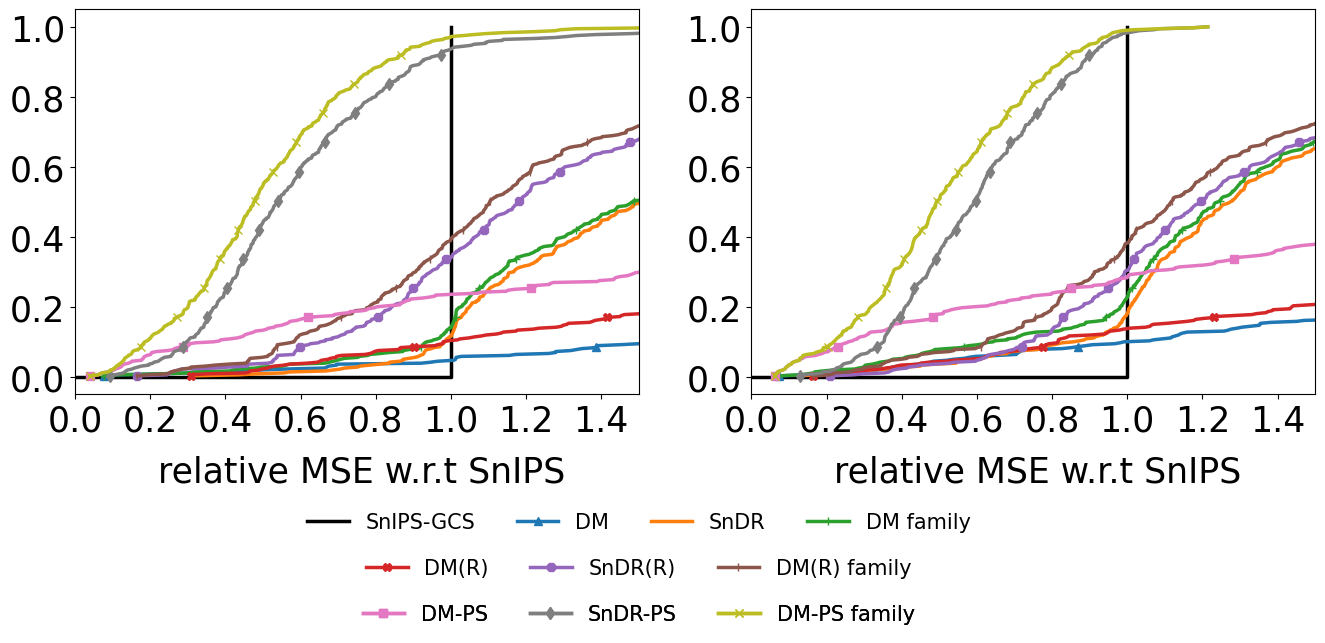

In [21]:
fig, ax = plt.subplots(figsize = (16, 5))
# fig = plt.figure(figsize=(8,5))
# plt.subplot(1, 2, 1)
# fig = plt.figure(figsize=(8,5))
# fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(8, 5))
fig2=plt.subplot(121)

for i in range(1):

#     file_list = os.listdir(path)
#     file_list = [file_list[i]]
    print(file_list)
    
    dm_list = []
    dmdr_list = []
    sndmdr_list = []
    robust_list = []
    triple_list = []
    sntriple_list = []
    snips_list = []
    min_robust_list = []
    min_dmrobust_list = []


    for file in file_list:

        data = pd.read_csv(path + file)

        snips = list(data.iloc[1,:])[2:]
        dm = list(data.iloc[2,:])[2:]
        dmdr = list(data.iloc[3,:])[2:]
        sndmdr = list(data.iloc[4,:])[2:]
        robust = list(data.iloc[5,:])[2:]
        triple = list(data.iloc[6,:])[2:]
        sntriple = list(data.iloc[7,:])[2:]
        
#         print(np.array(snips))



        sntriple_w = np.array(dm)/np.array(snips)
        dm_list += list(sntriple_w)

        sntriple_w = np.array(dmdr)/np.array(snips)
        dmdr_list += list(sntriple_w)
        
        sntriple_w = np.array(sndmdr)/np.array(snips)
        sndmdr_list += list(sntriple_w)

        sntriple_w = np.array(robust)/np.array(snips)
        robust_list += list(sntriple_w)

        sntriple_w = np.array(triple)/np.array(snips)
        triple_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple)/np.array(snips)
        sntriple_list += list(sntriple_w)

        sntriple_w = np.array(snips)/np.array(snips)
        snips_list += list(sntriple_w)

        triple1 = np.array(triple).reshape(len(triple),1)
        robust1 = np.array(robust).reshape(len(triple),1)
        sntriple1 = np.array(sntriple).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_list += list(sntriple_w)
        
        triple1 = np.array(dm).reshape(len(triple),1)
        robust1 = np.array(dmdr).reshape(len(triple),1)
        sntriple1 = np.array(sndmdr).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dmrobust_list += list(sntriple_w)
        
        

#         triple1 = np.array(triple).reshape(len(triple),1)
#         robust1 = np.array(robust).reshape(len(triple),1)
#         sntriple1 = np.array(sntriple).reshape(len(triple),1)
#         c = np.concatenate((triple1,robust1),axis = 1)
#         c = np.min(c,axis = 1)

#         sntriple_w = c/np.array(snips)
#         min_robusttriple_list += list(sntriple_w)
        
        




    

    dm_list.sort()
    dmdr_list.sort()
    sndmdr_list.sort()
    robust_list.sort()
    triple_list.sort()
    sntriple_list.sort()
    snips_list.sort()
    min_robust_list.sort()
    min_dmrobust_list.sort()


    y = []
    for i in range(len(sntriple_list)):
        y.append((i+1)/len(sntriple_list))
    dm0_list = []
    dr_list = []
    sndr_list = []
    min_dm_list = []
    for f in dm_file_list:
        data = pd.read_csv('tune/' + f)
        snips = list(data.iloc[1,:])[2:]
        dm = list(data.iloc[2,:])[2:]
        dr = list(data.iloc[3,:])[2:]
        sndr = list(data.iloc[4,:])[2:]


        sntriple_w = np.array(dm)/np.array(snips)
        dm0_list += list(sntriple_w)

        sntriple_w = np.array(dr)/np.array(snips)
        dr_list += list(sntriple_w)

        sntriple_w = np.array(sndr)/np.array(snips)
        sndr_list += list(sntriple_w)

        triple1 = np.array(dm).reshape(len(dm),1)
        robust1 = np.array(dr).reshape(len(dm),1)
        sntriple1 = np.array(sndr).reshape(len(dm),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dm_list += list(sntriple_w)


    dm0_list.sort()
    dr_list.sort()
    sndr_list.sort()
    min_dm_list.sort()
    y_dm = []
    for i in range(len(dm0_list)):
        y_dm.append((i+1)/len(dm0_list))




#     plt.figure(figsize=(8,5))


    plt.plot(xx + snips_list,yy + y,color = 'black',linewidth=2.5,markersize=6)

#     plt.plot(dm0_list,y_dm,marker ='^',markevery=30)
#     plt.plot(np.array(dr_list),y_dm,marker ='^',markevery=30)
#     plt.plot(np.array(sndr_list),y_dm,marker ='^',markevery=30)
#     plt.plot(min_dm_list,y_dm,marker ='^',markevery=30)

#     plt.plot(dm_list,y,marker ='x',markevery=30)
#     plt.plot(np.array(dmdr_list),y,marker ='x',markevery=30)
#     plt.plot(np.array(sndmdr_list),y,marker ='x',markevery=30)
#     plt.plot(min_dmrobust_list,y,marker ='x',markevery=30)

#     plt.plot(robust_list,y,marker ='d',markevery=30)
#     plt.plot(triple_list,y,marker ='d',markevery=30)
#     plt.plot(sntriple_list,y,marker ='d',markevery=30)
#     plt.plot(min_robust_list,y,marker ='d',markevery=30)


    plt.plot(dm0_list,y_dm,marker ='^',markevery=30,linewidth=2.5,markersize=6)
#     plt.plot(np.array(dr_list),y_dm,marker ='.',markevery=30)
    plt.plot(np.array(sndr_list),y_dm,marker =',',markevery=30,linewidth=2.5,markersize=6)
    plt.plot(min_dm_list,y_dm,marker ='+',markevery=30,linewidth=2.5,markersize=6)

    plt.plot(dm_list,y,marker ='X',markevery=30,linewidth=2.5,markersize=6)
#     plt.plot(np.array(dmdr_list),y,marker ='h',markevery=30)
    plt.plot(np.array(sndmdr_list),y,marker ='8',markevery=30,linewidth=2.5,markersize=6)
    plt.plot(min_dmrobust_list,y,marker ='|',markevery=30,linewidth=2.5,markersize=6)

    plt.plot(robust_list,y,marker ='s',markevery=30,linewidth=2.5,markersize=6)
#     plt.plot(triple_list,y,marker ='p',markevery=30,linewidth=2.5,markersize=6)
    plt.plot(sntriple_list,y,marker ='d',markevery=30,linewidth=2.5,markersize=6)
    plt.plot(min_robust_list,y,marker ='x',markevery=30,linewidth=2.5,markersize=6)






    # plt.plot(dmo_list,y_dm)

    # plt.plot(dr_list,y_dm)
    # plt.plot(sndr_list,y_dm)

    plt.xlim((0, 1.5))

    plt.xticks( size = 25)
    plt.yticks( size = 25)
    plt.text(0.22, -0.3,"relative MSE w.r.t SnIPS",fontsize = 25)




#     plt.legend(['SnIPS','DM','DR','SnDR','DM family','DM(R)','DR(R)','SnDR(R)','DM(R) family','DM-PS','DR-PS','SnDR-PS',\
#                 'DM-PS family'\
#                 ], bbox_to_anchor=(0.5, -0.3) ,borderaxespad = 0., loc=8,ncol=5)
#     plt.savefig('plot_pdf/compare_known_policyshift.pdf',dpi=600,bbox_inches = 'tight')
#     plt.show()






# fig, ax = plt.subplots(figsize = (8, 5))
# plt.subplot(1, 2, 2)
# fig = plt.figure(figsize=(8,5))
# fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(8, 5))
fig2=plt.subplot(122)
for i in range(1):


    
    dm_list = []
    dmdr_list = []
    sndmdr_list = []
    robust_list = []
    triple_list = []
    sntriple_list = []
    snips_list = []
    min_robust_list = []
    min_dmrobust_list = []


    for file in unknown_file_list:

        data = pd.read_csv(path + file)

        snips = list(data.iloc[1,:])[2:]
        dm = list(data.iloc[2,:])[2:]
        dmdr = list(data.iloc[3,:])[2:]
        sndmdr = list(data.iloc[4,:])[2:]
        robust = list(data.iloc[5,:])[2:]
        triple = list(data.iloc[6,:])[2:]
        sntriple = list(data.iloc[7,:])[2:]
        



        sntriple_w = np.array(dm)/np.array(snips)
        dm_list += list(sntriple_w)

        sntriple_w = np.array(dmdr)/np.array(snips)
        dmdr_list += list(sntriple_w)
        
        sntriple_w = np.array(sndmdr)/np.array(snips)
        sndmdr_list += list(sntriple_w)

        sntriple_w = np.array(robust)/np.array(snips)
        robust_list += list(sntriple_w)

        sntriple_w = np.array(triple)/np.array(snips)
        triple_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple)/np.array(snips)
        sntriple_list += list(sntriple_w)

        sntriple_w = np.array(snips)/np.array(snips)
        snips_list += list(sntriple_w)

        triple1 = np.array(triple).reshape(len(triple),1)
        robust1 = np.array(robust).reshape(len(triple),1)
        sntriple1 = np.array(sntriple).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_list += list(sntriple_w)
        
        triple1 = np.array(dm).reshape(len(triple),1)
        robust1 = np.array(dmdr).reshape(len(triple),1)
        sntriple1 = np.array(sndmdr).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dmrobust_list += list(sntriple_w)




    

    dm_list.sort()
    dmdr_list.sort()
    sndmdr_list.sort()
    robust_list.sort()
    triple_list.sort()
    sntriple_list.sort()
    snips_list.sort()
    min_robust_list.sort()
    min_dmrobust_list.sort()


    y = []
    for i in range(len(sntriple_list)):
        y.append((i+1)/len(sntriple_list))
    dm0_list = []
    dr_list = []
    sndr_list = []
    min_dm_list = []
    for f in unknown_dm_file_list:
        data = pd.read_csv('tune/' + f)
        snips = list(data.iloc[1,:])[2:]
        dm = list(data.iloc[2,:])[2:]
        dr = list(data.iloc[3,:])[2:]
        sndr = list(data.iloc[4,:])[2:]


        sntriple_w = np.array(dm)/np.array(snips)
        dm0_list += list(sntriple_w)

        sntriple_w = np.array(dr)/np.array(snips)
        dr_list += list(sntriple_w)

        sntriple_w = np.array(sndr)/np.array(snips)
        sndr_list += list(sntriple_w)

        triple1 = np.array(dm).reshape(len(dm),1)
        robust1 = np.array(dr).reshape(len(dm),1)
        sntriple1 = np.array(sndr).reshape(len(dm),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dm_list += list(sntriple_w)


    dm0_list.sort()
    dr_list.sort()
    sndr_list.sort()
    min_dm_list.sort()
    y_dm = []
    for i in range(len(dm0_list)):
        y_dm.append((i+1)/len(dm0_list))




#     plt.figure(figsize=(8,5))


    lsnips = plt.plot(xx + snips_list,yy + y,c = 'black',linewidth=2.5,markersize=6)
    

#     plt.plot(dm0_list,y_dm)
#     plt.plot(np.array(dr_list),y_dm)
#     plt.plot(np.array(sndr_list),y_dm)
#
    ldm = plt.plot(dm0_list,y_dm,marker ='^',markevery=30,linewidth=2.5,markersize=6)
#     plt.plot(np.array(dr_list),y_dm,marker ='.',markevery=30)
    lsndr = plt.plot(np.array(sndr_list),y_dm,marker =',',markevery=30,linewidth=2.5,markersize=6)
    ldmf = plt.plot(min_dm_list,y_dm,marker ='+',markevery=30,linewidth=2.5,markersize=6)

    ldmr = plt.plot(dm_list,y,marker ='X',markevery=30,linewidth=2.5,markersize=6)
#     plt.plot(np.array(dmdr_list),y,marker ='h',markevery=30)
    lsndrr = plt.plot(np.array(sndmdr_list),y,marker ='8',markevery=30,linewidth=2.5,markersize=6)
    ldmrf = plt.plot(min_dmrobust_list,y,marker ='|',markevery=30,linewidth=2.5,markersize=6)

    ldmps = plt.plot(robust_list,y,marker ='s',markevery=30,linewidth=2.5,markersize=6)
#     plt.plot(triple_list,y,marker ='p',markevery=30)
    lsndrps = plt.plot(sntriple_list,y,marker ='d',markevery=30,linewidth=2.5,markersize=6)
    ldmpsf = plt.plot(min_robust_list,y,marker ='x',markevery=30,linewidth=2.5,markersize=6)






    # plt.plot(dmo_list,y_dm)

    # plt.plot(dr_list,y_dm)
    # plt.plot(sndr_list,y_dm)

    plt.xlim((0, 1.5))

    plt.xticks( size = 25)
    plt.yticks( size = 25)
    plt.text(0.22, -0.3,"relative MSE w.r.t SnIPS",fontsize = 25)





    legend1 = plt.legend([lsnips[0], ldm[0], lsndr[0], ldmf[0]],\
                         ['SnIPS-GCS','DM','SnDR','DM family' ], bbox_to_anchor=(-0.2, -0.38) ,borderaxespad = 0., loc=8,ncol=4,fontsize=15,framealpha = 0)
    plt.gca().add_artist(legend1)
    legend1 = plt.legend([ldmr[0], lsndrr[0], ldmrf[0]],\
                         ['DM(R)','SnDR(R)','DM(R) family'], bbox_to_anchor=(-0.2, -0.50) ,borderaxespad = 0., loc=8,ncol=3,fontsize=15,framealpha = 0)
    plt.gca().add_artist(legend1)
    legend1 = plt.legend([ldmps[0], lsndrps[0], ldmpsf[0]],\
                         ['DM-PS','SnDR-PS','DM-PS family'], bbox_to_anchor=(-0.2, -0.62) ,borderaxespad = 0., loc=8,ncol=3,fontsize=15,framealpha = 0)
    plt.gca().add_artist(legend1)
    
#     plt.legend(['SnIPS','DM','DR','SnDR','DM family','DM(R)','DR(R)','SnDR(R)','DM(R) family','DM-PS','DR-PS','SnDR-PS',\
#                 'DM-PS family'\
#                 ], bbox_to_anchor=(-0.1, -0.48) ,borderaxespad = 0., loc=8,ncol=7,fontsize = 15)
# plt.show()
plt.savefig('plot_pdf/ps_in_one_plot.pdf',dpi=600,bbox_inches = 'tight')


In [7]:
handles, labels = ax.get_legend_handles_labels()


In [9]:
handles

[]